# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Archana Branch- https://github.com/archinarula/Group-5-Project/tree/Archana/Archana_WorkingFolder/Resources



# Dependencies and Load Data

In [1]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
%matplotlib inline

Import the combined data

In [2]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [3]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 16)


,Extract_Date,Reported_Date,City,is_newyork,Population,Data_Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [4]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["is_newyork","Population","Data_Source","Extract_Date"], axis=1)
Combined_df.head()

,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2020-03-01,New York,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2020-03-02,New York,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2020-03-03,New York,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2020-03-04,New York,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [5]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   New_Cases                     886 non-null    int64         
 3   mavg_7day_new_cases           886 non-null    float64       
 4   new_cases_per_100K            886 non-null    float64       
 5   mavg_7day_per_100k_new_cases  886 non-null    float64       
 6   daily_temp                    886 non-null    float64       
 7   daily_humidity                886 non-null    float64       
 8   mavg_7_temp                   886 non-null    float64       
 9   mavg_7_humidity               886 non-null    float64       
 10  mavg_15_temp                  886 non-null    float64       
 11  mavg_15_humidity              88

In [6]:
import warnings
warnings.filterwarnings("ignore")

# CORRELATION- Both Cities combined

Both Cities-all variables

<AxesSubplot:>

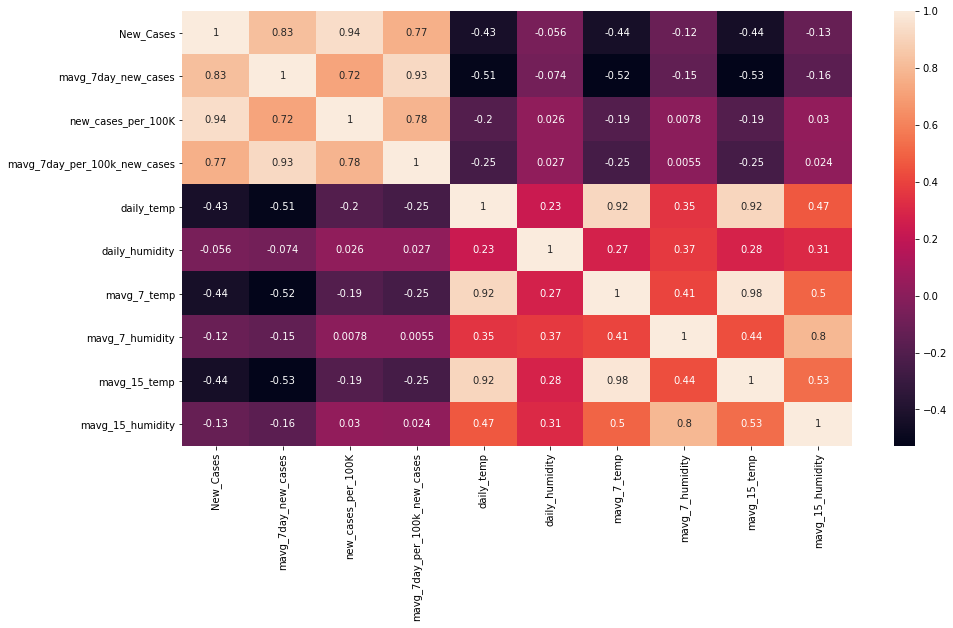

In [7]:
# Let us get the correlation in the data using Seaborn Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(Combined_df.corr(), annot = True)

In [8]:
# Correlation using Spearman correlation test 
Combined_df.corr(method='spearman').style.background_gradient('viridis')

,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
New_Cases,1.000000,0.851225,0.973199,0.804293,-0.402970,-0.048307,-0.406692,-0.128732,-0.419427,-0.151174
mavg_7day_new_cases,0.851225,1.000000,0.818860,0.952108,-0.444492,-0.052937,-0.447354,-0.138314,-0.458916,-0.165008
new_cases_per_100K,0.973199,0.818860,1.000000,0.836380,-0.265432,0.006730,-0.266434,-0.021746,-0.279697,-0.014931
mavg_7day_per_100k_new_cases,0.804293,0.952108,0.836380,1.000000,-0.256181,0.018092,-0.252565,0.000146,-0.262387,0.016829
daily_temp,-0.402970,-0.444492,-0.265432,-0.256181,1.000000,0.149263,0.902887,0.345074,0.883967,0.506385
daily_humidity,-0.048307,-0.052937,0.006730,0.018092,0.149263,1.000000,0.236358,0.285398,0.239906,0.268435
mavg_7_temp,-0.406692,-0.447354,-0.266434,-0.252565,0.902887,0.236358,1.000000,0.364418,0.967387,0.510854
mavg_7_humidity,-0.128732,-0.138314,-0.021746,0.000146,0.345074,0.285398,0.364418,1.000000,0.412868,0.751355
mavg_15_temp,-0.419427,-0.458916,-0.279697,-0.262387,0.883967,0.239906,0.967387,0.412868,1.000000,0.536373
mavg_15_humidity,-0.151174,-0.165008,-0.014931,0.016829,0.506385,0.268435,0.510854,0.751355,0.536373,1.000000


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [9]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NewCases100K = Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NewCases100K.shape)
NewCases100K.head()

(886, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.01,4.190667,54.404000
4,2020-03-04,0.03,4.576667,55.585333


In [10]:
# Spearman correlation test 
NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.279697,-0.014931
mavg_15_temp,-0.279697,1.000000,0.536373
mavg_15_humidity,-0.014931,0.536373,1.000000


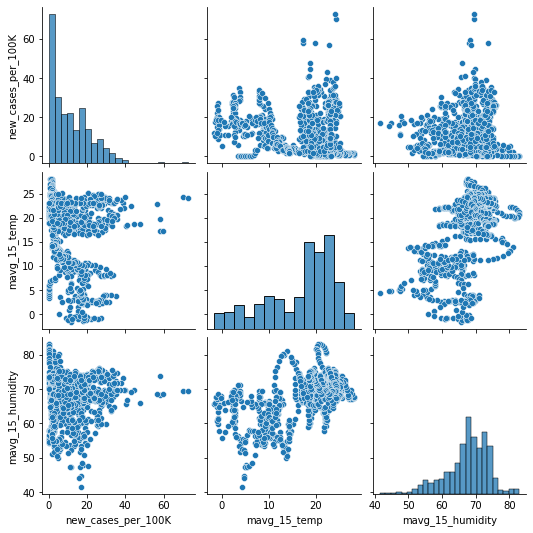

In [11]:
#Pair Plotting to see relationship

PP_NewCases100K= sns.pairplot(data=NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [12]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

MAVG7NewCases100K = Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (MAVG7NewCases100K.shape)
MAVG7NewCases100K.head()

(886, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.00,4.190667,54.404000
4,2020-03-04,0.01,4.576667,55.585333


In [13]:
# Spearman correlation test 
MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.262387,0.016829
mavg_15_temp,-0.262387,1.000000,0.536373
mavg_15_humidity,0.016829,0.536373,1.000000


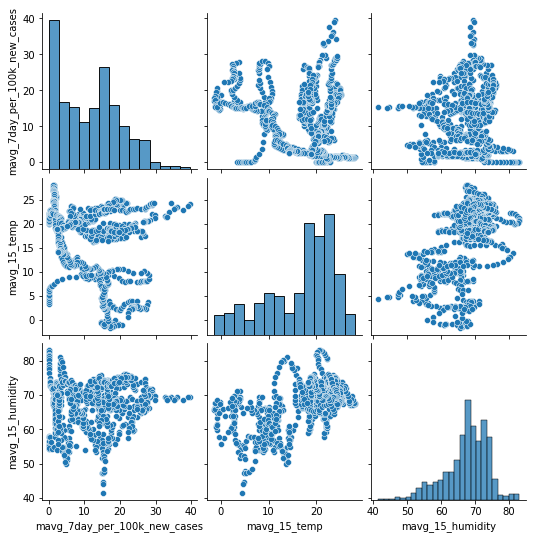

In [14]:
#Pair Plotting to see relationship
PP_MAVG7NewCases100K = sns.pairplot(data=MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- New York Only (Combined Data) 


In [15]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2020-03-01,New York,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2020-03-02,New York,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2020-03-03,New York,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2020-03-04,New York,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [16]:
#extract relevant coloumns to check the relations- NY new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NY_NewCases100K = NY_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NY_NewCases100K.shape)
NY_NewCases100K.head()

(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.01,4.190667,54.404000
4,2020-03-04,0.03,4.576667,55.585333


In [17]:
# Spearman correlation test 
NY_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.790140,-0.249497
mavg_15_temp,-0.790140,1.000000,0.380189
mavg_15_humidity,-0.249497,0.380189,1.000000


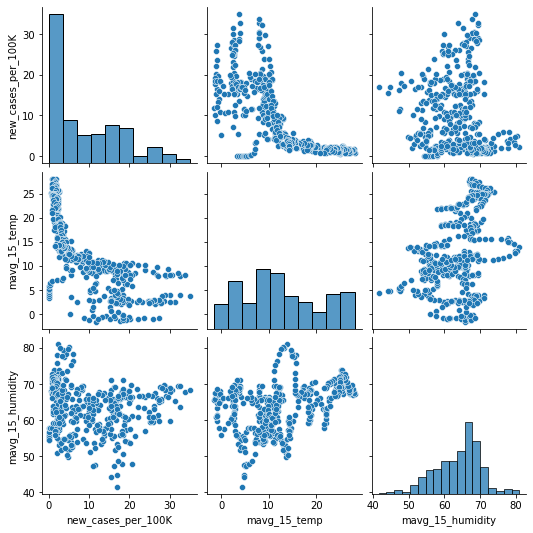

In [18]:
#Pair Plotting to see relationship

#PP_NY_NewCases_dailyTH = sns.pairplot(data=NY_NewCases_dailyTH, y_vars=['New_Cases'],x_vars=['daily_temp', 'daily_humidity'])

PP_NY_NewCases100K= sns.pairplot(data=NY_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [19]:
#extract relevant coloumns to check the relations- NY Moving 7 days Avgs

NY_MAVG7NewCases100K = NY_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (NY_MAVG7NewCases100K.shape)
NY_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.00,4.190667,54.404000
4,2020-03-04,0.01,4.576667,55.585333


In [20]:
# Spearman correlation test 
NY_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.806508,-0.247759
mavg_15_temp,-0.806508,1.000000,0.380189
mavg_15_humidity,-0.247759,0.380189,1.000000


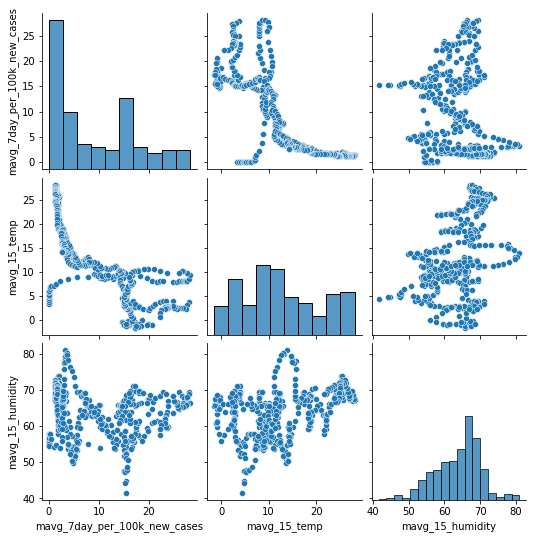

In [21]:
#Pair Plotting to see relationship

#PP_NY_MAVG7NewCases_TH = sns.pairplot(data=NY_MAVG7NewCases_TH, y_vars=['mavg_7day_new_cases'],x_vars=['mavg_7_temp', 'mavg_7_humidity'])

PP_NY_MAVG7NewCases100K = sns.pairplot(data=NY_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- Sau Paulo Only (Combined Data)

In [22]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2020-02-29,Sao Paulo,0,0.20,0.00,0.0,20.47,85.96,20.224286,83.507143,22.213333,80.343333
444,2020-03-01,Sao Paulo,0,0.17,0.00,0.0,19.50,85.50,20.374286,83.578571,22.159333,80.812667
445,2020-03-02,Sao Paulo,0,0.14,0.00,0.0,19.61,85.81,20.490000,84.471429,21.902000,81.646000
446,2020-03-03,Sao Paulo,0,0.14,0.00,0.0,19.17,85.53,20.321429,85.334286,21.606667,82.187333
447,2020-03-04,Sao Paulo,1,0.29,0.01,0.0,19.61,79.08,19.787143,85.832857,21.242000,82.764000


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [23]:
#extract relevant coloumns to check the relations- SP new_cases_per_100K with mavg_15_temp and mavg_15_humidity

SP_NewCases100K = SP_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (SP_NewCases100K.shape)
SP_NewCases100K.head()


(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.00,22.213333,80.343333
444,2020-03-01,0.00,22.159333,80.812667
445,2020-03-02,0.00,21.902000,81.646000
446,2020-03-03,0.00,21.606667,82.187333
447,2020-03-04,0.01,21.242000,82.764000


In [24]:
# Spearman correlation test 
SP_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,0.031767,-0.109070
mavg_15_temp,0.031767,1.000000,0.229808
mavg_15_humidity,-0.109070,0.229808,1.000000


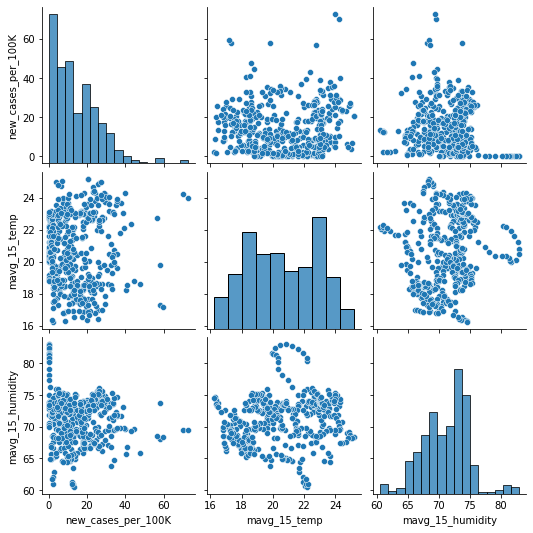

In [25]:
#Pair Plotting to see relationship

PP_SP_NewCases100K= sns.pairplot(data=SP_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [26]:
#extract relevant coloumns to check the relations- SP mavg_7day_per_100k_new_cases with mavg_15_temp and mavg_15_humidity

SP_MAVG7NewCases100K = SP_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (SP_MAVG7NewCases100K.shape)
SP_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.0,22.213333,80.343333
444,2020-03-01,0.0,22.159333,80.812667
445,2020-03-02,0.0,21.902000,81.646000
446,2020-03-03,0.0,21.606667,82.187333
447,2020-03-04,0.0,21.242000,82.764000


In [27]:
# Spearman correlation test 
SP_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,0.052505,-0.115123
mavg_15_temp,0.052505,1.000000,0.229808
mavg_15_humidity,-0.115123,0.229808,1.000000


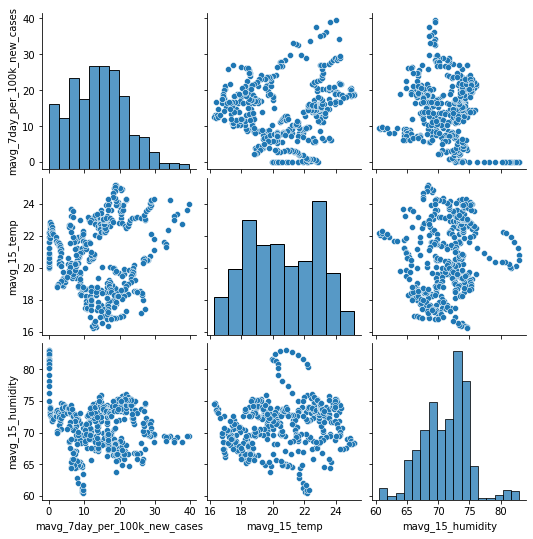

In [28]:
#Pair Plotting to see relationship

PP_SP_MAVG7NewCases100K= sns.pairplot(data=SP_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])